# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [1]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [2]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        mse = (1 / len(y)) * np.power(np.linalg.norm(np.dot(X, w) - y), 2)
        return mse
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        grad = (2 / len(y)) * np.dot(X.T, (np.dot(X, w) - y))
        return grad

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [5]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init # .copy() ?
    weights = np.zeros((n_iterations + 1, len(w_init)))
    weights[0] = w
    for i in range(n_iterations):
        grad = loss.calc_grad(X, y, w)
        w = w - lr * grad
        weights[i + 1] = w
    return weights

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [6]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [7]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.5891768045025
0.8670644395649495


In [8]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss, title):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)
    
    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    if title == 'gd':
        plt.title("GD trajectory")
    elif title == 'sgd':
        plt.title("SGD trajectory")
    else:
        plt.title(title)
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

lr = 0.1


<ipython-input-9-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


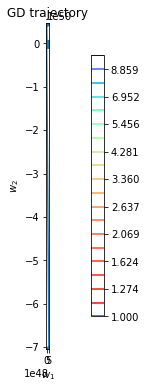

w0: [0.62074297 1.79288146], w_d: [ 5.36822043e+48 -7.04383122e+50]
3.953433947960349e+103

lr = 0.01


<ipython-input-9-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


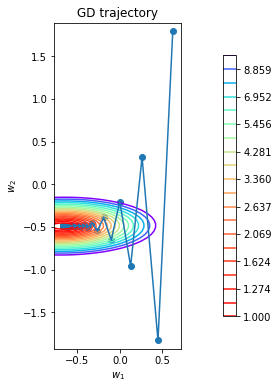

w0: [0.62074297 1.79288146], w_d: [-0.66706623 -0.48984355]
0.8670719772817391

lr = 0.001


<ipython-input-9-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


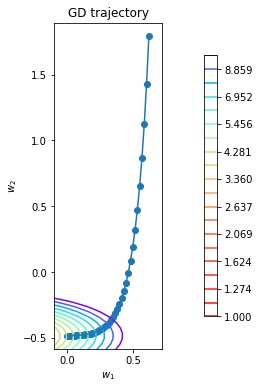

w0: [0.62074297 1.79288146], w_d: [ 0.00240675 -0.48343834]
4.326140711579451

lr = 0.0001


<ipython-input-9-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


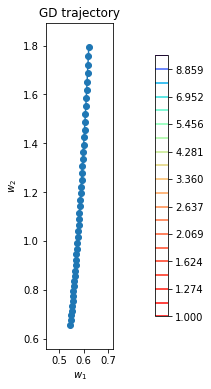

w0: [0.62074297 1.79288146], w_d: [0.54569307 0.65859552]
115.7611692816098



In [11]:
for lr in [0.1, 0.01, 0.001, 0.0001]:
    w_list = gradient_descent(w_init, X, y, loss, lr=lr, n_iterations=num_steps)
    print(f'lr = {lr}')
    plot_gd(w_list, X, y, loss, 'gd')
    print(f'w0: {w_list[0]}, w_d: {w_list[-1]}')
    print(loss.calc_loss(X, y, w_list[-1]))
    print()

In [ ]:
* lr = 0.1 - огромный learning rate для данной задачи
  При таком шаге градиентный спуск разошелся, и веса получились настолько большие, что нельзя построить график.
    
* lr = 0.01 - оптимальный шаг из [0.1, 0.01, 0.001, 0.0001] для данной задачи
  Градиентный спуск сошелся.
Модель хорошо обучается при полученных при данном learning rate весах, ошибка близка к 0, равна 0.8670719772817391.

* lr = 0.001 - маленький шаг для нашего GD при количестве итераций num_steps = 43
  Так как градиентный спуск двигается очень аккуратно, он просто не успевает дойти до минимума функции потерь.

* lr = 0.0001 - слишком маленький шаг для нашего GD при количестве итераций num_steps = 43
  Градиентный спуск тем более не успевает достигнуть минимум ошибки, более того, при такой маленькой длине шага даже после
43 повторений он находится очень далеко от минимума (при данных начальных весах w_init).

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [9]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init
    weights = np.zeros((n_iterations + 1, len(w_init)))
    weights[0] = w
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        grad = loss.calc_grad(batch, y[batch_indices], w)
        w = w - lr * grad
        weights[i + 1] = w
    return weights

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

lr = 0.01, batch_size = 10


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


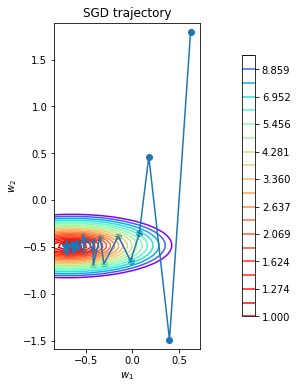

w0: [0.62074297 1.79288146], w_d: [-0.71442052 -0.56496316]
1.3292906041038448

lr = 0.01, batch_size = 30


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


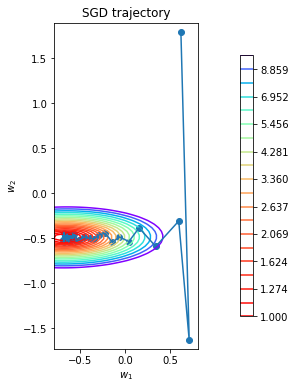

w0: [0.62074297 1.79288146], w_d: [-0.65854688 -0.47020639]
0.8983023766213856

lr = 0.01, batch_size = 50


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


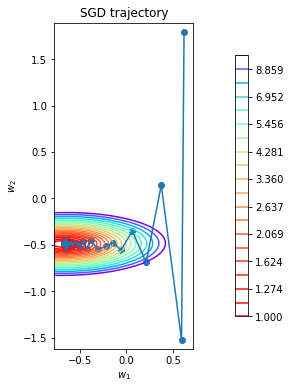

w0: [0.62074297 1.79288146], w_d: [-0.67491012 -0.50159135]
0.8783193707490373

lr = 0.01, batch_size = 100


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


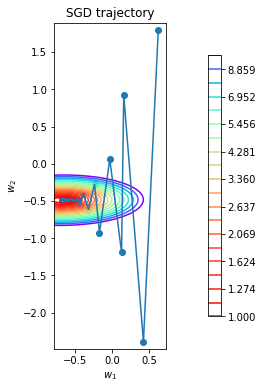

w0: [0.62074297 1.79288146], w_d: [-0.67023996 -0.48328281]
0.8705541561668098

lr = 0.01, batch_size = 150


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


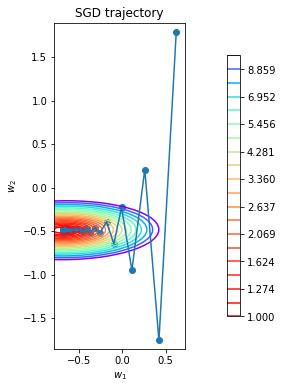

w0: [0.62074297 1.79288146], w_d: [-0.67626707 -0.49117282]
0.867710747977409

lr = 0.0045, batch_size = 10


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


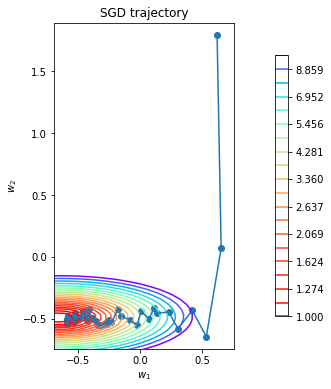

w0: [0.62074297 1.79288146], w_d: [-0.59567862 -0.50213042]
0.9203797930231509

lr = 0.0045, batch_size = 30


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


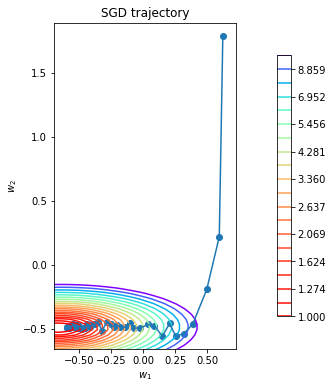

w0: [0.62074297 1.79288146], w_d: [-0.59666261 -0.49324577]
0.9074865309738507

lr = 0.0045, batch_size = 50


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


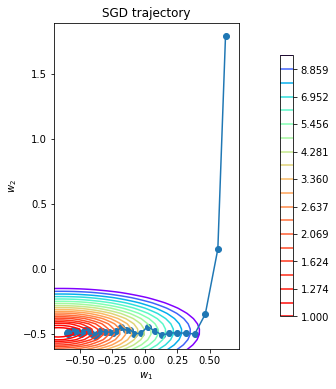

w0: [0.62074297 1.79288146], w_d: [-0.59748746 -0.49181636]
0.9058609404821816

lr = 0.0045, batch_size = 100


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


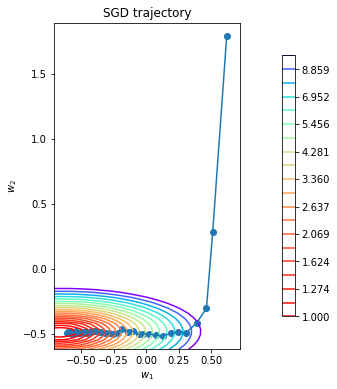

w0: [0.62074297 1.79288146], w_d: [-0.6068589 -0.4965387]
0.8999072998121252

lr = 0.0045, batch_size = 150


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


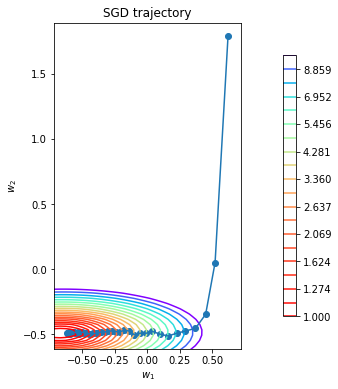

w0: [0.62074297 1.79288146], w_d: [-0.61365273 -0.49150627]
0.8901661121126582

lr = 0.001, batch_size = 10


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


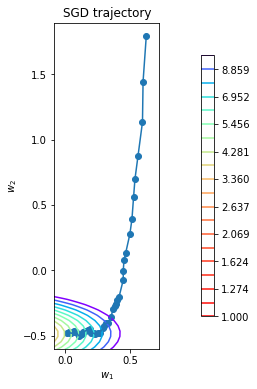

w0: [0.62074297 1.79288146], w_d: [ 0.01702007 -0.47770756]
4.48269708150489

lr = 0.001, batch_size = 30


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


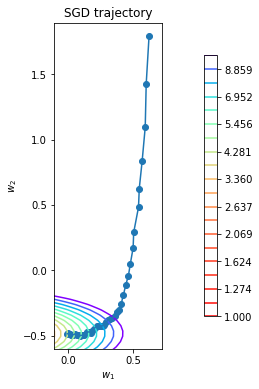

w0: [0.62074297 1.79288146], w_d: [-0.00461741 -0.48627967]
4.2538691214106406

lr = 0.001, batch_size = 50


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


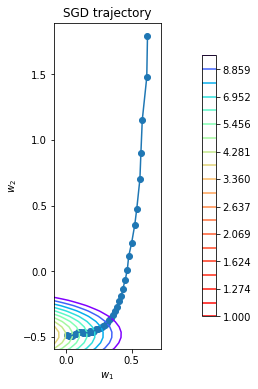

w0: [0.62074297 1.79288146], w_d: [ 0.01007606 -0.48965104]
4.407057078398385

lr = 0.001, batch_size = 100


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


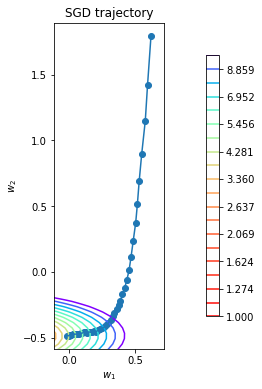

w0: [0.62074297 1.79288146], w_d: [-0.0138833  -0.48168892]
4.160915614925081

lr = 0.001, batch_size = 150


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


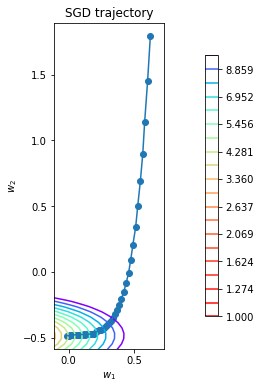

w0: [0.62074297 1.79288146], w_d: [-0.00913006 -0.48280182]
4.208377146495163

lr = 0.00045, batch_size = 10


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


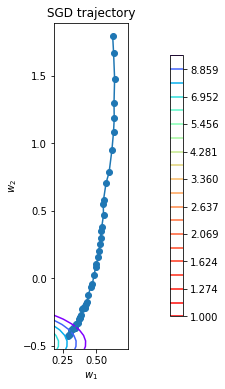

w0: [0.62074297 1.79288146], w_d: [ 0.28757132 -0.42454843]
8.168575140597959

lr = 0.00045, batch_size = 30


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


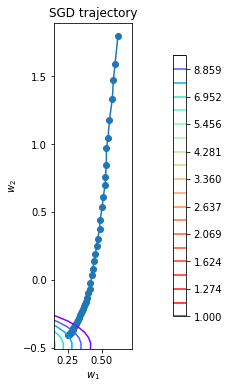

w0: [0.62074297 1.79288146], w_d: [ 0.25203674 -0.4078287 ]
7.837384909091829

lr = 0.00045, batch_size = 50


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


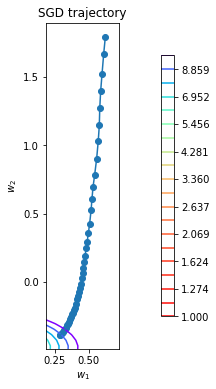

w0: [0.62074297 1.79288146], w_d: [ 0.28734989 -0.38814178]
8.61160882727356

lr = 0.00045, batch_size = 100


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


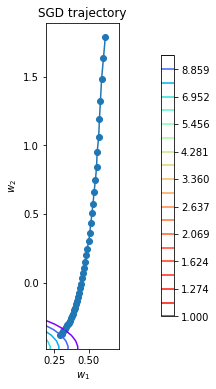

w0: [0.62074297 1.79288146], w_d: [ 0.28848554 -0.38286841]
8.710343517453651

lr = 0.00045, batch_size = 150


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


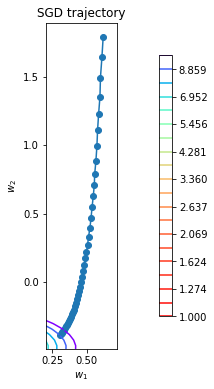

w0: [0.62074297 1.79288146], w_d: [ 0.30301039 -0.38916068]
8.826768538186595



In [108]:
for lr in [0.01, 0.0045, 0.001, 0.00045]:
    for batch in [10, 30, 50, 100, 150]:
        w_list = stochastic_gradient_descent(w_init, X, y, loss, lr=lr, batch_size=batch, n_iterations=num_steps)
        print(f'lr = {lr}, batch_size = {batch}')
        plot_gd(w_list, X, y, loss, 'sgd')
        print(f'w0: {w_list[0]}, w_d: {w_list[-1]}')
        print(loss.calc_loss(X, y, w_list[-1]))
        print()

In [ ]:
* При длине шага lr = 0.01 и небольших размерах выборки batch_size = 10, 30, 50 метод стохастического градиента находит
  веса, приближающие MSE к ее минимальному значению, однако шагает довольно неаккуратно и, в конце своего пути, «бродит» 
вокруг оптимума. С увеличением batch_size до 100 колебания вокруг минимума значительно уменьшаются, хоть и не исчезают. 
Заметим, что 100 объектов, рандомно выбранные из Х, составляют треть от нашей выборки. И следовательно, довольно сильно 
приближают результат обычного градиентного спуска. По этой причине, при увеличении этой величины еще на 50 
(batch_size = 150), при том же шаге lr = 0.01 результат SGD (веса) не будет значительно отличаться (от того, что вернул SGD 
при batch_size = 100).
С увеличением размера выборки batch_size ошибка уменьшается, но чем больше мы наращиваем величину mini batch, тем меньше 
прирост качества модели.

* При lr = 0.0045 SGD шагает аккуратнее и нет такого разброса значений весов, как в начале пути алгоритма, так и при
  приближении к оптимуму (см. рисунок). С увеличением размера выборки колебания уменьшаются и в какой-то момент вовсе
прекращаются. Ошибка постепенно уменьшается.

* При меньших длинах шага lr SGD движется более направленно, но не успевает дойти до оптимума. При этом даже на их графиках 
  заметно, что с ростом размера батча batch_size колебания в изменении весов, подбираемых моделью, стремятся к нулю. 
Это связано как с выбранной длиной шага, символизирующей "аккуратность" движения по спуску, так и с размером выборки. 
При маленьком объеме выборки нам могут попасться выбросы или просто не совсем типичные объекты из Х, которые повлияют на 
подобранные моделью веса. С увеличением размера выборки те или иные значения, посчитанные по увеличенной выборке, стремятся 
к аналогичным вычислениям по всему датасету. Это само по себе стабилизирует траекторию стохастического градиентного спуска,
а также делает заметнее влияние lr на него (опять же из-за уменьшения влияния выбросов и т.п.)

Наилучшими из рассмотренных для данной задачи являются параметры lr = 0.01 и batch_size = 150. MSE = 0.867710747977409.

In [ ]:
Вывод: чем больше размер подвыборки, тем более стабильная траектория градиентного спуска. 
Хорошие значения для lr хоть чаще всего и лежат в промежутке от 0.0001 до 0.1, для каждого алгоритма они свои. И если при 
одних и тех же значениях lr одни алгоритмы сходятся к оптимуму, другие напросто расходятся.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точно этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [8]:
def stochastic_gradient_descent_with_decaying_step(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                                loss: BaseLoss, lr: float, batch_size: int, 
                                p: float, s0: float = 1., n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init
    weights = np.zeros((n_iterations + 1, len(w_init)))
    weights[0] = w
    for i in range(n_iterations):
        step_size = lr * np.power(s0 / (s0 + i), p)
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        grad = loss.calc_grad(batch, y[batch_indices], w)
        w = w - step_size * grad
        weights[i + 1] = w
    return weights

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

p = 0.06


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


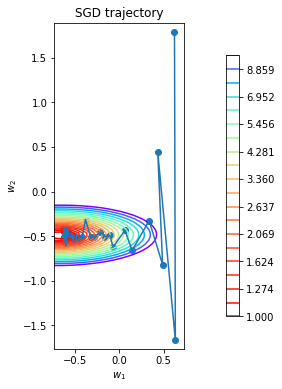

w0: [0.62074297 1.79288146], w_d: [-0.62134782 -0.56851701]
1.3809301389785755

p = 0.1


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


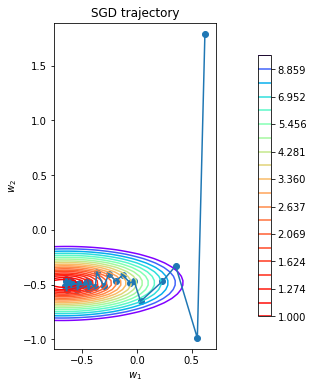

w0: [0.62074297 1.79288146], w_d: [-0.64453052 -0.48931575]
0.8713340344612226

p = 0.15


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


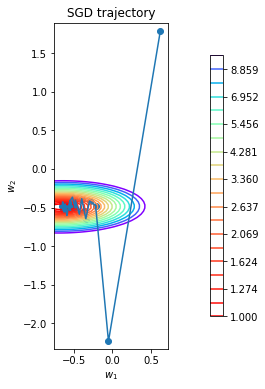

w0: [0.62074297 1.79288146], w_d: [-0.64657653 -0.45073065]
0.9916258129567409

p = 0.2


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


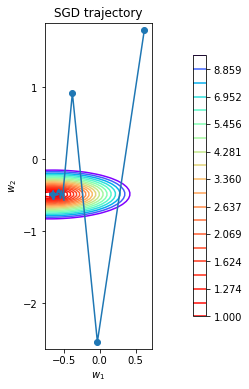

w0: [0.62074297 1.79288146], w_d: [-0.64476638 -0.43916997]
1.0745899887636172

p = 0.3


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


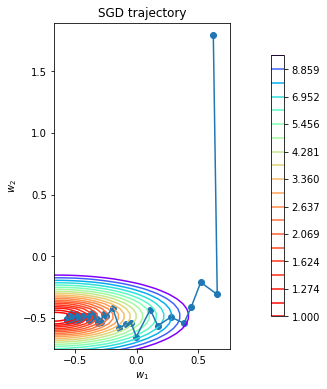

w0: [0.62074297 1.79288146], w_d: [-0.56780495 -0.50502907]
0.9644575114514987

p = 0.5


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


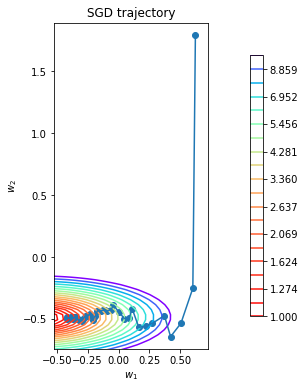

w0: [0.62074297 1.79288146], w_d: [-0.41935187 -0.50104591]
1.356269119125283

p = 0.8


<ipython-input-100-ab3df77d871e>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


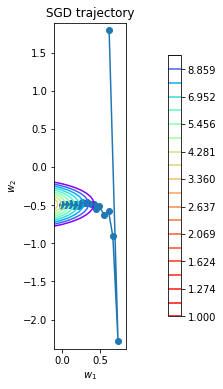

w0: [0.62074297 1.79288146], w_d: [ 0.00247624 -0.50819004]
4.368585072496648



In [136]:
for p in [0.06, 0.1, 0.15, 0.2, 0.3, 0.5, 0.8]:
    w_list = stochastic_gradient_descent_with_decaying_step(w_init, X, y, loss, lr=0.01, batch_size=10,
                                                                                    p=p, n_iterations=num_steps)
    print(f'p = {p}')
    plot_gd(w_list, X, y, loss, 'sgd')
    print(f'w0: {w_list[0]}, w_d: {w_list[-1]}')
    print(loss.calc_loss(X, y, w_list[-1]))
    print()
    
# При данном batch_size сложно отследить влияние гиперпараметра р на поведение стохастического градиентного спуска.
# Но если взять batch_size=50, к примеру, становится видно, что при более маленьких из выбранных значениях р (0.1, 0.15, 0.2)
# ошибка меньше, нежели при остальных. Но в нашей задаче эта ошибка близка к той, что была при SGD с фиксированной длиной
# шага.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

In [9]:
from scipy.linalg import norm

step_size_sgd = 1e-2
step_size_gd = 1e-2
w_sgd = w_init
w_gd = w_init
residuals_sgd = [np.mean(np.power(np.dot(X, w_sgd) - y, 2))] 
residuals_gd = [np.mean(np.power(np.dot(X, w_gd) - y, 2))]


for i in range(num_steps):
    step_size = step_size_sgd / ((i+1) ** 0.51)
    sample = np.random.randint(n_objects, size=batch_size)
    
    # стохастический градиентный спуск
    w_sgd -= 2 * step_size * np.dot(X[sample].T, np.dot(X[sample], w_sgd) - y[sample]) / batch_size
    residuals_sgd.append(np.mean(np.power(np.dot(X, w_sgd) - y, 2)))
    
    # градиентный спуск
    w_gd -= 2 * step_size_gd * np.dot(X.T, np.dot(X, w_gd) - y) / y.shape[0]
    residuals_gd.append(np.mean(np.power(np.dot(X, w_gd) - y, 2)))

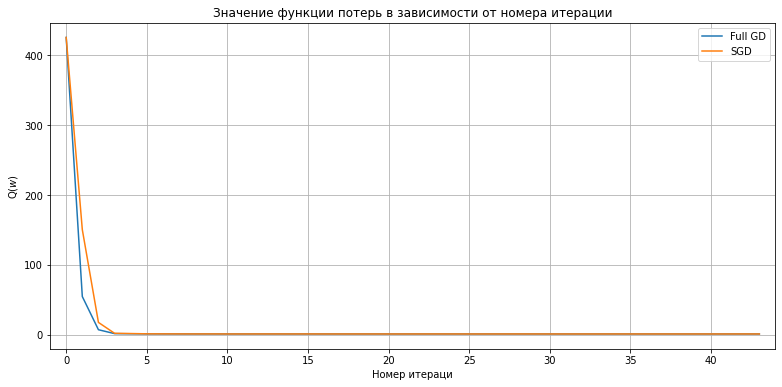

In [10]:
plt.figure(figsize=(13, 6))
plt.plot(range(num_steps+1), residuals_gd, label='Full GD')
plt.plot(range(num_steps+1), residuals_sgd, label='SGD')

plt.title('Значение функции потерь в зависимости от номера итерации')
plt.xlim((-1, num_steps+1))
plt.legend()
plt.xlabel('Номер итераци')
plt.ylabel(r'Q($w$)')
plt.grid()
plt.show()

In [12]:
На данном графике видно, что график функции потерь для SGD с увеличением числа итераций приближается к графику функции 
потерь для GD, и в какой-то момент их уже невозможно различить. При этом мы знаем, что SGD занимает гораздо меньше времени
при решении той же задачи.
Очевидно, что при помощи стохастического градиентного спуска мы получаем те же результаты, но значительно быстрее.

In [48]:
# w_sgd2 = w_init
# w_gd2 = w_init

# residuals_gd2 = []
# residuals_sgd2 = []
# w_list_gd2 = gradient_descent(w_gd2, X, y, loss, lr=1e-2, n_iterations=num_steps)
# w_list_sgd2 = stochastic_gradient_descent_with_decaying_step(w_sgd2, X, y, loss, lr=1e-2, batch_size=10,
#                                                                                     p=0.51, n_iterations=num_steps)
# for i in range(num_steps+1):
#     residuals_gd2.append(loss.calc_loss(X, y, w_list_gd2[i]))
#     residuals_sgd2.append(loss.calc_loss(X, y, w_list_sgd2[i]))

In [50]:
# plt.figure(figsize=(13, 6))
# plt.plot(range(num_steps+1), residuals_gd2, label='Full GD')
# #plt.plot(range(num_steps+1), residuals_sgd2, label='SGD')

# plt.title('Значение функции потерь в зависимости от номера итерации')
# plt.xlim((-1, num_steps+1))
# plt.legend()
# plt.xlabel('Номер итераци')
# plt.ylabel(r'Q($w$)')
# plt.grid()
# plt.show()

In [51]:
# plt.figure(figsize=(13, 6))
# #plt.plot(range(num_steps+1), residuals_gd2, label='Full GD')
# plt.plot(range(num_steps+1), residuals_sgd2, label='SGD')

# plt.title('Значение функции потерь в зависимости от номера итерации')
# plt.xlim((-1, num_steps+1))
# plt.legend()
# plt.xlabel('Номер итераци')
# plt.ylabel(r'Q($w$)')
# plt.grid()
# plt.show()

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [52]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        w_init = np.random.uniform(-2, 2, (X.shape[1]))
        w = gradient_descent(w_init, X, y, loss=self.loss, lr=self.lr, n_iterations=num_steps)[-1]
        self.w = w
        
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        y_pred = np.dot(X, self.w)
        return y_pred

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [53]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [54]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"]
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [55]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [56]:
y.isnull().any().any()

False

In [57]:
# Заполним пропуски
from sklearn.impute import SimpleImputer

In [58]:
cat_features_mask = (X_raw.dtypes == "object").values

# для вещественнозначных признаков заполним пропуски средними
X_real = X_raw[X_raw.columns[~cat_features_mask]]
mis_replacer = SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_real), columns=X_real.columns)
# для категориальных - пустыми строками
X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("")
X_no_mis = pd.concat([X_no_mis_real, X_cat], axis=1)

In [59]:
# Преобразуем категориальные признаки
X_dum = pd.get_dummies(X_no_mis, drop_first=True)

In [60]:
# Отмасштабируем признаки
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
X_real_norm_np = normalizer.fit_transform(X_dum)
X = pd.DataFrame(data=X_real_norm_np)

In [61]:
# Разделим датасет на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

In [62]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
119,0.598039,0.6,0.465969,0.206997,0.391045,0.299145,0.250000,0.272692,0.139623,0.307143,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.024510,0.8,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.464286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
63,0.323529,0.4,0.298429,0.533528,0.505970,0.495726,0.550000,0.470132,0.275472,0.635714,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36,0.181373,0.4,0.214660,0.288630,0.394030,0.418803,0.458333,0.290147,0.184906,0.435714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,0.848039,0.2,0.000000,0.460641,0.514925,0.529915,0.591667,0.325058,0.230189,0.550000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [63]:
y_train.head()

119     7609.0
5      15250.0
63     18344.0
36      7895.0
169     8948.0
Name: 25, dtype: float64

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [64]:
linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [65]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, linear_regression.predict(X_train))
mse_test = mean_squared_error(y_test, linear_regression.predict(X_test))

print(f'MSE on train: {mse_train}')
print(f'MSE on test: {mse_test}')

MSE on train: 8620738.751156611
MSE on test: 9338803.07216647


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

In [66]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
        # последний элемент вектора w - это bias (в классе LinearRegression в матрице Х добавляется колонка из единиц -
        # константный признак), его регулировать не нужно => убираем последний элемент из w при подсчете 𝜆||𝑤||^2 в 
        # calc_loss и зануляем его при подсчете 2𝜆𝑤 в calc_grad
        mse = (1 / len(y)) * np.power(np.linalg.norm(np.dot(X, w) - y), 2) + self.coef * np.power(np.linalg.norm(w[:-1]), 2)
        return mse
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        w_0 = w.copy()
        w_0[-1] = 0
        grad = (2 / len(y)) * np.dot(X.T, (np.dot(X, w) - y)) + 2 * self.coef * w_0
        return grad

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [32]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [33]:
linear_regression.fit(X_train, y_train)

In [34]:
mse_train = mean_squared_error(y_train, linear_regression.predict(X_train))
mse_test = mean_squared_error(y_test, linear_regression.predict(X_test))

print(f'𝜆 = {0.1}')
print(f'MSE on train: {mse_train}')
print(f'MSE on test: {mse_test}')

𝜆 = 0.1
MSE on train: 11043260.06132181
MSE on test: 14650734.164681854


In [70]:
for alpha in [0.00000001, 0.001, 0.002, 0.003, 0.005, 0.007, 0.008, 0.01, 0.02, 0.03, 0.05, 0.07]:
    linear_regression = LinearRegression(MSEL2Loss(alpha))
    linear_regression.fit(X_train, y_train)
    
    mse_train = mean_squared_error(y_train, linear_regression.predict(X_train))
    mse_test = mean_squared_error(y_test, linear_regression.predict(X_test))

    print(f'𝜆 = {alpha}')
    print(f'MSE on train: {mse_train}')
    print(f'MSE on test: {mse_test}')

𝜆 = 1e-08
MSE on train: 8619309.246785222
MSE on test: 9338621.458794752
𝜆 = 0.001
MSE on train: 8640775.23227565
MSE on test: 9347529.626924109
𝜆 = 0.002
MSE on train: 8663727.048830325
MSE on test: 9359014.55507197
𝜆 = 0.003
MSE on train: 8685383.769244432
MSE on test: 9366955.424418109
𝜆 = 0.005
MSE on train: 8730227.286241958
MSE on test: 9386814.745515099
𝜆 = 0.007
MSE on train: 8776347.515458876
MSE on test: 9406972.490375597
𝜆 = 0.008
MSE on train: 8797813.272601
MSE on test: 9413162.95599915
𝜆 = 0.01
MSE on train: 8843800.181006473
MSE on test: 9435633.95692425
𝜆 = 0.02
MSE on train: 9085637.358547345
MSE on test: 9547832.679254431
𝜆 = 0.03
MSE on train: 9340388.353766263
MSE on test: 9673464.600316335
𝜆 = 0.05
MSE on train: 9882351.872901382
MSE on test: 9963595.955198113
𝜆 = 0.07
MSE on train: 10456985.31549657
MSE on test: 10291253.24322303


In [ ]:
8620738.751156611, 9338803.07216647 - результат на обучающей и тестовой выборках соответственно для регрессии без 
                                                                                                            регуляризации
8619309.246785222, 9338621.458794752 - результат на обучающей и тестовой выборках соответственно для регрессии с 
                                                                                                            регуляризацией

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [67]:
# можно сделать так
from sklearn.linear_model import HuberRegressor

In [68]:
huber = HuberRegressor().fit(X_train, y_train)

c:\users\79152\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [69]:
huber.get_params()['epsilon']

1.35

In [83]:
print(f'𝜀 = {huber.get_params()["epsilon"]}')
print(f'MSE on train: {np.mean((huber.predict(X_train) - y_train) ** 2)}')
print(f'MSE on test:  {np.mean((huber.predict(X_test) - y_test) ** 2)}')

𝜀 = 1.35
MSE on train: 4330330.387598942
MSE on test:  5089938.922767361


In [ ]:
# а можно сделать так

In [249]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
        y_pred = np.dot(X, w)
        cond = np.abs(y_pred - y) - self.eps
        loss_vec = np.zeros(len(y))
        # np.abs(y_pred - y) < eps <=> np.abs(y_pred - y) - eps < 0 <=> cond < 0
        loss_vec[cond < 0] =  1/2 * (y_pred[cond < 0] - y[cond < 0]) ** 2
        loss_vec[cond >= 0] = eps * (np.abs(y_pred[cond >= 0] - y[cond >= 0]) - 1/2 * self.eps)
        return np.mean(loss_vec)
        
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        y_pred = np.dot(X, w)
        cond = np.abs(y_pred - y) - self.eps
        grad_vec = np.zeros([X.shape[0], X.shape[1]])
        less = np.unique(np.where(X[cond < 0])[0])
        more_or_equal = np.unique(np.where(X[cond >= 0])[0])
        if len(less) > 0:
            grad_vec[less] =  X[cond < 0] * (y_pred[cond < 0] - y[cond < 0]).reshape([X[cond < 0].shape[0], 1])
        
        grad_vec[more_or_equal] = X[cond >= 0] * (np.sign(y_pred[cond >= 0] - y[cond >= 0]) * self.eps).reshape([X[cond >= 0].shape[0], 1])
        return np.mean(grad_vec)  # np.unique(np.mean(grad_vec))

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [250]:
linear_regression = LinearRegression(HuberLoss(10 ** 300))

In [251]:
linear_regression.fit(X_train, y_train)

In [252]:
mse_train = mean_squared_error(y_train, linear_regression.predict(X_train))
mse_test = mean_squared_error(y_test, linear_regression.predict(X_test))

print(f'𝜀 = {1.35}')
print(f'MSE on train: {mse_train}')
print(f'MSE on test: {mse_test}')

𝜀 = 1.35
MSE on train: 57546456.32251078
MSE on test: 49382769.75206107


**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

In [ ]:
# :)

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [ ]:
# https://habr.com/ru/post/209610/

In [406]:
def Simulated_Annealing_Algorithm(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, t: float, t_min: float = 0.1, n_iterations: int = 10000) -> List[np.ndarray]:
    """
    Функция алгоритма имитации отжига
    :param w_init: np.ndarray размера (X.shape[0],) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, X.shape[0]) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param t: float -- температура в настоящий момент времени
    :param t_min: float -- минимальная температура
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (X.shape[0],) -- история весов на каждом шаге
    """
    weights = [w_init]
    old_w = w_init
    i = 0
    while (t > t_min) & (i <= n_iterations):
        i += 1 # номер итерации
        new_w = old_w + np.random.standard_t(3.5, size=old_w.shape) # новая точка (вектор весов)
        diff = loss.calc_loss(X, y, new_w) - loss.calc_loss(X, y, old_w) # разница между ошибками в new_w и old_w
        if diff < 0: # ошибка уменьшается при переходе в точку new_w
            old_w = new_w
        else:
            p_new = np.exp(-diff / t) 
            w = np.random.choice(['new_w', 'old_w'], 1, p=[p_new, 1 - p_new])[0]
            old_w = new_w if w == 'new_w' else old_w
        weights.append(old_w)
        t *= 1 / i # убывающая функция
    return weights

In [382]:
np.random.seed(1337)

n_features = 2
n_objects = 300

w_true_gd = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true_gd) + np.random.normal(0, 1, (n_objects))
w_init_gd = np.random.uniform(-2, 2, (n_features))

In [383]:
loss2 = MSELoss()
w_list_gd = gradient_descent(w_init_gd, X, y, loss2, lr=0.01)

In [384]:
w_list_gd

array([[ 0.62074297,  1.79288146],
       [ 0.44735749, -1.8304003 ],
       [ 0.26091556,  0.31793598],
       ...,
       [-0.66805599, -0.48985109],
       [-0.66805599, -0.48985109],
       [-0.66805599, -0.48985109]])

In [411]:
w_init_anneal = w_init_gd
w_list_anneal = Simulated_Annealing_Algorithm(w_init_anneal, X, y, loss2, 10 ** (20), 10 ** (-10))

print(f'Final loss for gradient descent: {loss2.calc_loss(X, y, w_list_gd[-1])}')
print(f'Final loss for Simulated Annealing Algorithm: {loss2.calc_loss(X, y, w_list_anneal[-1])}')

Final loss for gradient descent: 0.8670644395649093
Final loss for Simulated Annealing Algorithm: 1.2876591232701367


<ipython-input-366-133b4f6f081b>:36: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


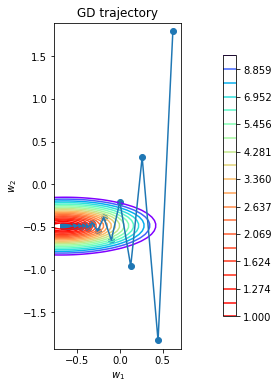

In [404]:
plot_gd(w_list_gd, X, y, loss2, 'gd')

<ipython-input-366-133b4f6f081b>:36: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


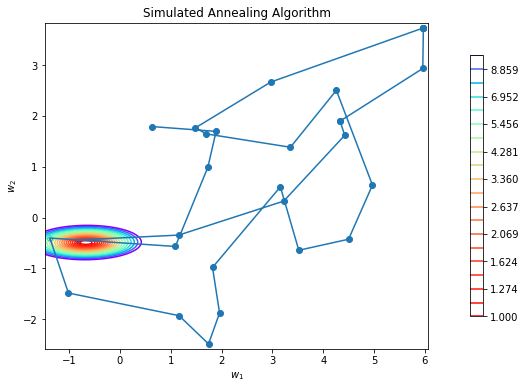

In [412]:
plot_gd(w_list_anneal, X, y, loss2, 'Simulated Annealing Algorithm')

In [ ]:
# Использовать градиентный спуск гораздо приятнее, на мой взгляд.